## Cross Validation

In [1]:
library(ISLR)
library(boot)

In [2]:
?cv.glm

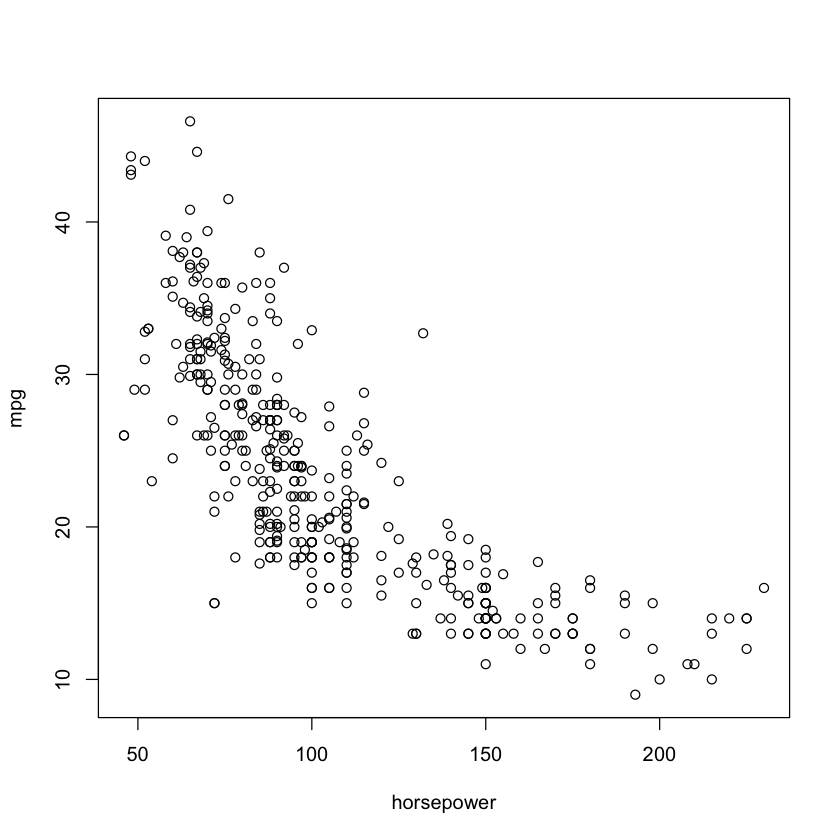

In [3]:
plot(mpg~horsepower, data=Auto)

#### LOOCV

In [4]:
glm.fit = glm(mpg~horsepower, data=Auto)
cv.glm(Auto, glm.fit)$delta # slow

[1] 24.23151 24.23114

Let's write a function to use formula 5.2:

With least squares linear or polynomial regression, LOOCV can be calculated as follow:

$$ CV_{(n)} = \frac{1}{n} \sum_{i=1}^{n} \left ( \frac{y_i - \hat{y}_i}{1 - h_i} \right )^2 \qquad (5.2) $$

where $\hat{y}_i$ is the $i$th fitted value from the original least squares fit, and $h_i$ is the leverage (diagonal of the 'hat' matrix)

In [6]:
loocv=function(fit){
    h=lm.influence(fit)$h
    mean((residuals(fit)/(1-h))^2)
}

In [7]:
loocv(glm.fit)

[1] 24.23151

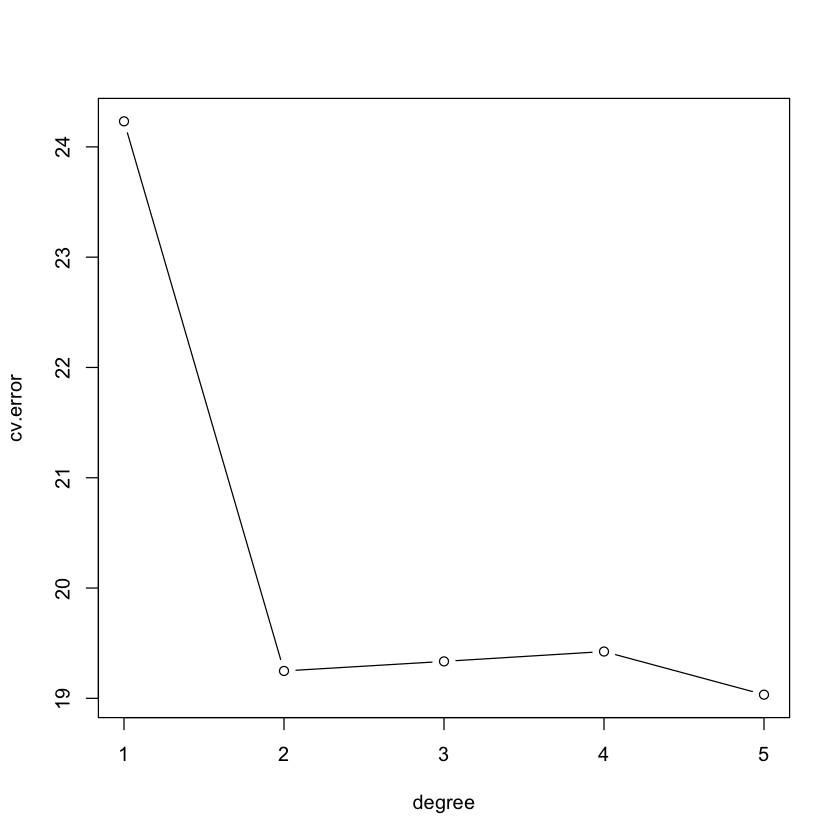

In [9]:
cv.error=rep(0,5)
degree = 1:5
for(d in degree){
    glm.fit=glm(mpg~poly(horsepower, d), data=Auto)
    cv.error[d]=loocv(glm.fit)
}

plot(degree, cv.error, type = "b")

#### K-fold CV

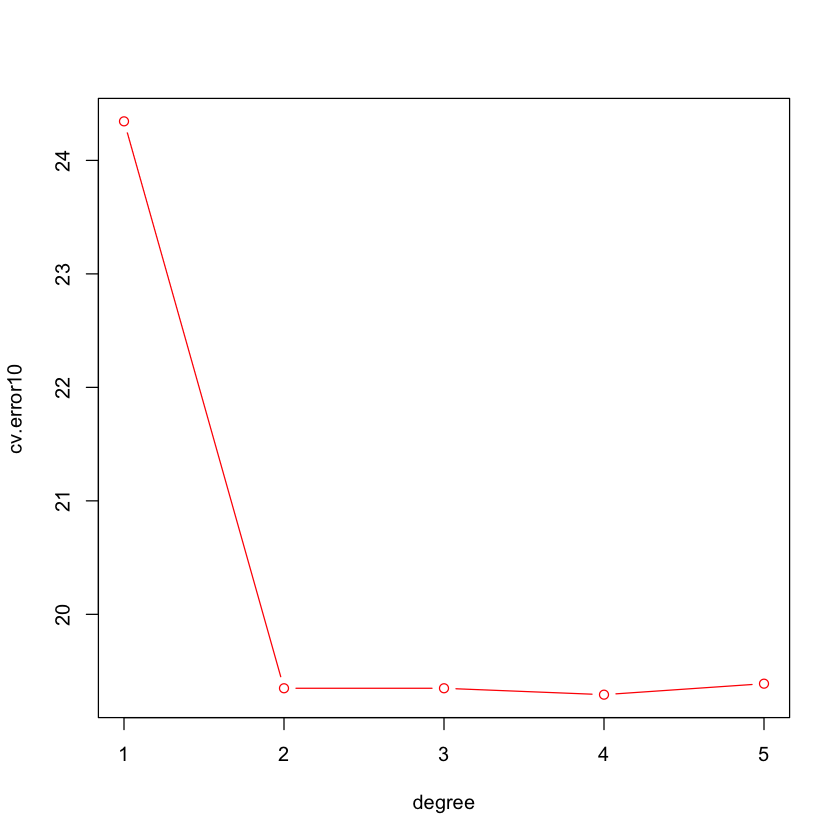

In [12]:
cv.error10=rep(0,5)
for(d in degree){
    glm.fit=glm(mpg~poly(horsepower, d), data=Auto)
    cv.error10[d]=cv.glm(Auto, glm.fit, K=10)$delta[1]
}

plot(degree, cv.error10, type = "b", col="red")

## Bootstrap

In [16]:
# Minimum risk invesment

alpha=function(x,y){
    vx=var(x)
    vy=var(y)
    cxy=cov(x,y)
    (vy-cxy)/(vx+vy-2*cxy)
}

In [17]:
alpha(Portfolio$X, Portfolio$Y)

[1] 0.5758321

What is the standard error of alpha?

In [20]:
alpha.fn = function(data, index){
    with(data[index,], alpha(X,Y))
}

In [21]:
alpha.fn(Portfolio, 1:100)

[1] 0.5758321

In [22]:
set.seed(1)
alpha.fn(Portfolio, sample(1:100, 100, replace = TRUE))

[1] 0.7368375


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Portfolio, statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
     original       bias    std. error
t1* 0.5758321 -0.001539618  0.08846251

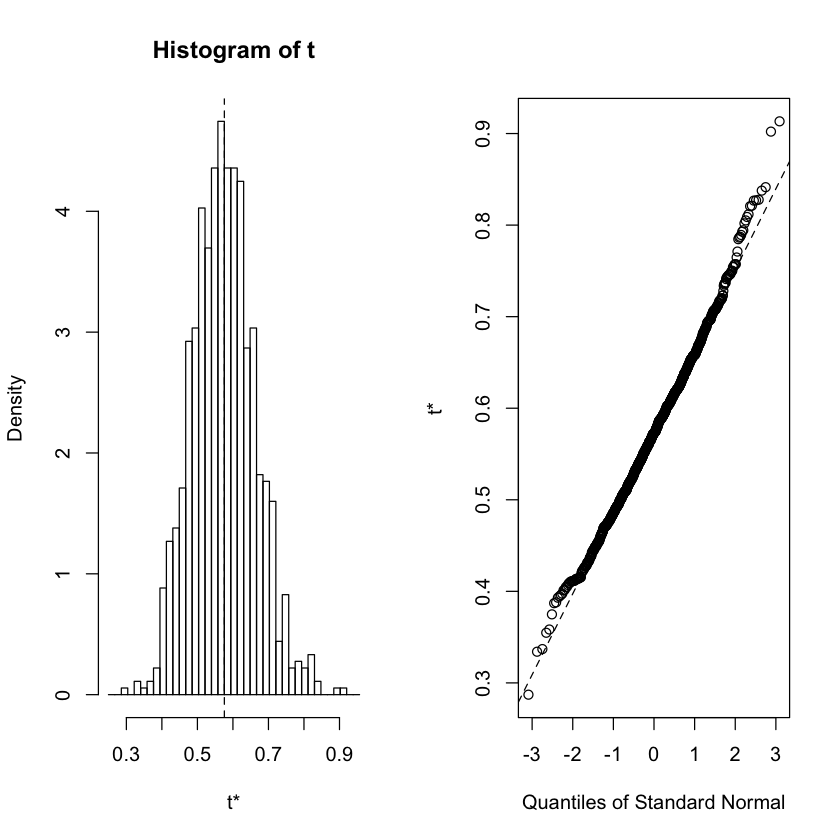

In [23]:
boot.out = boot(Portfolio, alpha.fn, R=1000)
boot.out
plot(boot.out)